<a href="https://colab.research.google.com/github/javgonzalezvi/MetNumUN2022I/blob/master/Lab12/week_6_calculus_Group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [19]:
def deriv(f, x, h):
   
    f_d = lambda q: (f(x+q*h) - f(x))/(q*h)

    fder = 2*f_d(0.5) - f_d(1)

    return fder

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [20]:
x = 0

for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    
    print(h,"---------",err)

0.01 --------- -5.000000000000001e-05
0.001 --------- -5e-07
0.0001 --------- -5.000000000000001e-09
1e-05 --------- -5.000000000000001e-11


 ... ENTER YOUR COMMENTS HERE ...

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [33]:
from math import log
import matplotlib.pyplot as plt

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [34]:
def two_points(f, x, h):
    return (f(x+h)-f(x))/h

eps = []
err1 = [abs(fder(1) - deriv(f, 1, pow(10, -i))) for i in range(1, 20)] 
err2 = [abs(fder(1) - two_points(f, 1, pow(10, -i))) for i in range(1, 20)] 

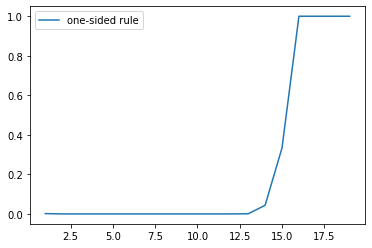

In [35]:
err1 = [abs(fder(1) - deriv(f, 1, pow(10, -i))) for i in range(1, 20)] 

plt.plot(list(range(1, 20)), err1)
plt.legend(labels = ["one-sided rule"])
plt.show()

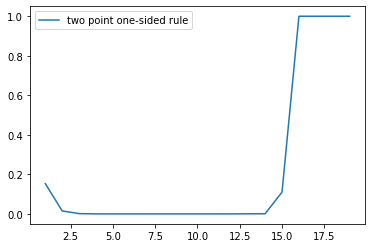

In [38]:
err2 = [abs(fder(1) - two_points(f, 1, pow(10, -i))) for i in range(1, 20)] 

plt.plot(list(range(1, 20)), err2)
plt.legend(labels = ["two point one-sided rule"])
plt.show()

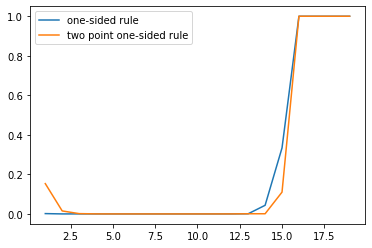

In [37]:
plt.plot(list(range(1, 20)), err1)
plt.plot(list(range(1, 20)), err2)
plt.legend(labels = ["one-sided rule", "two point one-sided rule"])
plt.show()

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [42]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print(h,'------------', err)

0.01 ------------ -0.006931471805599457
0.001 ------------ -0.0006931471805599453
0.0001 ------------ -6.931471805599455e-05
1e-05 ------------ -6.93147180559945e-06


# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [49]:
def midpoint(func, a, b, eps):
    
    N = 5
    err = eps+1
    prev_iter = 1e30
    
    while err > eps and N < 1e5:
        h = (b - a)/N
        intg = 0

        for i in range(1, N+1):
            intg += func(h*i-h/2.0)*h

        err = abs(prev_iter - intg)
        prev_iter = intg
        N = N*2
        
    return prev_iter, N/2

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [54]:
for h in [1e-2, 1e-3, 1e-4, 1e-10]:

    err = midpoint(lambda x: x**3, 0, 1, h)
    print(err[1])
    print(h, " ------- " ,err[0]-0.25)

10.0
0.01  -------  -0.0012500000000000011
20.0
0.001  -------  -0.0003124999999999656
80.0
0.0001  -------  -1.9531249999982236e-05
81920.0
1e-10  -------  -1.8626294950863098e-11


### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [53]:
import numpy as np

func = lambda x: np.sin(np.sqrt(x))/x
m_func = lambda x: (np.sqrt(x)*np.sin(np.sqrt(x))-x)/(x*np.sqrt(x))

true_integral = 1.8921661407343660298827066

for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = midpoint(func, 0, 1, h)
    print(err[1])
    print(h, "|||||||" ,err[0]-true_integral)
    
    err = midpoint(m_func, 0, 1, h)
    print(err[1])
    print(h, "|||||||" ,err[0]+2 - true_integral)
    
    
    print("---------------")

640.0
0.01 ||||||| -0.023911286981694646
10.0
0.01 ||||||| -0.0002907672033141129
---------------
81920.0
0.001 ||||||| -0.002113429313944648
10.0
0.001 ||||||| -0.0002907672033141129
---------------
81920.0
0.0001 ||||||| -0.002113429313944648
40.0
0.0001 ||||||| -3.8242972253854646e-05
---------------
81920.0
1e-05 ||||||| -0.002113429313944648
160.0
1e-05 ||||||| -4.897720521590543e-06
---------------
